# Implementing logistic regression using Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
import scipy.optimize as opt

In [2]:
###Reading data from text file.
myData = np.loadtxt('data/ex2data1.txt',delimiter=',')

In [3]:
###Examine the data
print(type(myData))
print(myData.shape)
print(myData[:5,:])

<class 'numpy.ndarray'>
(100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


In [4]:
####Separating Attributes/Features and Labels
X = myData[:,:-1]
y = myData[:,-1,None]
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [5]:
###Adding interceptor term X0 to the inputs
X0 = np.ones((X.shape[0],1))
print(X0.shape)
X = np.append(X0,X,axis=1)
print(X.shape)
print(X[:5,:])

(100, 1)
(100, 3)
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


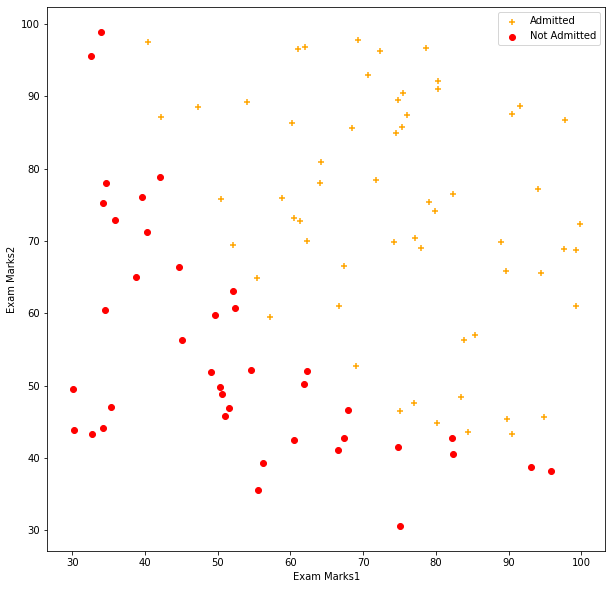

In [6]:
###Plotting the inputs as per labels
pos = y == 1
neg = y == 0

plt.scatter(X[:,1,None][pos],X[:,2,None][pos],marker='+',color='orange',label='Admitted')
plt.scatter(X[:,1,None][neg],X[:,2,None][neg],marker='o',color='red',label='Not Admitted')
plt.xlabel('Exam Marks1')
plt.ylabel('Exam Marks2')
plt.legend()

In [7]:
####Sigmoid/logistic function
def Sigmoid(X):
    s = 1/(1+np.exp(-X))
    return s

In [8]:
####Compute cost
def costFunction(Theta,X,y):
    # m -> number of examples
    m = X.shape[0]
    Theta = Theta.reshape(X.shape[1],1)
    #print(Theta.shape)
    grads = np.zeros(Theta.shape)
    # A -> is predicted value
    A = Sigmoid(np.dot(X,Theta))
    assert(A.shape == y.shape)
    
    #Calculating the Cost
    cost = - (np.dot(y.T,np.log(A)) + np.dot((1-y).T,np.log(1-A)))/m
    
    grads = np.dot(X.T,(A-y))/m
    
    return cost,grads

In [9]:
initial_theta = np.zeros((X.shape[1],1))
cost,grad = costFunction(initial_theta,X,y)

In [10]:
print(grad.shape)
print(cost)

(3, 1)
[[0.69314718]]


In [11]:
test_theta = np.array([-24,0.2,0.2])
cost,grad = costFunction(test_theta,X,y)
print(cost)
print(grad)

[[0.21833019]]
[[0.04290299]
 [2.56623412]
 [2.64679737]]


In [12]:
#Importing optimizer to calculate the gradient descent
import scipy.optimize as opt

In [13]:
result = opt.fmin_tnc(func=costFunction,x0=initial_theta,args=(X,y))

In [14]:
print(result)

(array([-25.16131857,   0.20623159,   0.20147149]), 36, 0)


In [15]:
Theta = result[0].reshape(initial_theta.shape)

In [16]:
Theta.shape

(3, 1)

In [17]:
prob = Sigmoid(np.array([1,45,85])@Theta)
print(prob)

[0.77629062]


In [18]:
def predict(X,Theta):
    pred = Sigmoid(np.dot(X,Theta))
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
    return pred

In [19]:
p =predict(X,Theta)

In [20]:
print("Train accuracy is "+str(np.average(p==y)*100))

Train accuracy is 89.0


In [21]:
np.sum(p==y)

89

In [22]:
plotting_x1 = np.linspace(30, 100, 100)

In [23]:
plotting_x1.shape

(100,)

In [24]:
plotting_h1 = (- result[0][0] - result[0][1] * plotting_x1) / result[0][2]

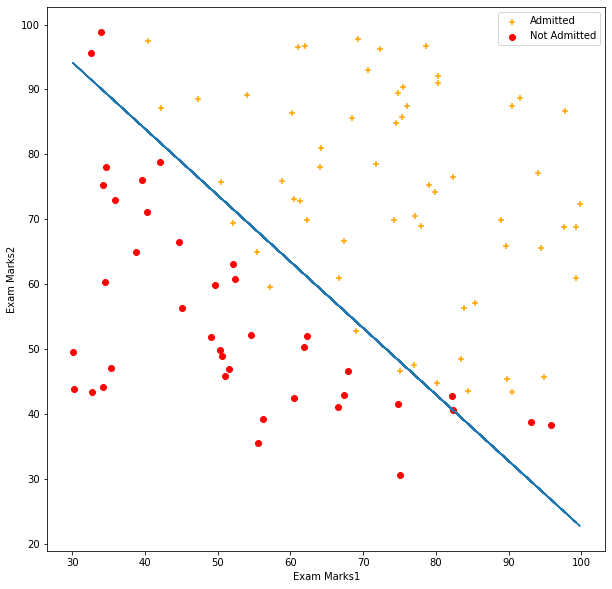

In [25]:

###Plotting the inputs as per labels
pos = y == 1
neg = y == 0

plt.scatter(X[:,1,None][pos],X[:,2,None][pos],marker='+',color='orange',label='Admitted')
plt.scatter(X[:,1,None][neg],X[:,2,None][neg],marker='o',color='red',label='Not Admitted')
plt.plot(X[:,1],-(Theta[0]+(Theta[1]*X[:,1]))/Theta[2])
plt.xlabel('Exam Marks1')
plt.ylabel('Exam Marks2')
plt.legend()

# Implementing regularization for overfitting

In [26]:
####Loading Data######
myData1 = np.loadtxt('data/ex2data2.txt',delimiter=',')

In [27]:
print(type(myData1))
print(myData1.shape)


<class 'numpy.ndarray'>
(118, 3)


In [28]:
###Adding interceptor term and separating labes and inputs
X = myData1[:,:-1]
X0 = np.ones((X.shape[0],1))
X = np.append(X0,X,axis=1)
y = myData1[:,-1,None]
print(y.shape)
print(X.shape)

(118, 1)
(118, 3)


In [29]:
print(np.unique(y))

[0. 1.]


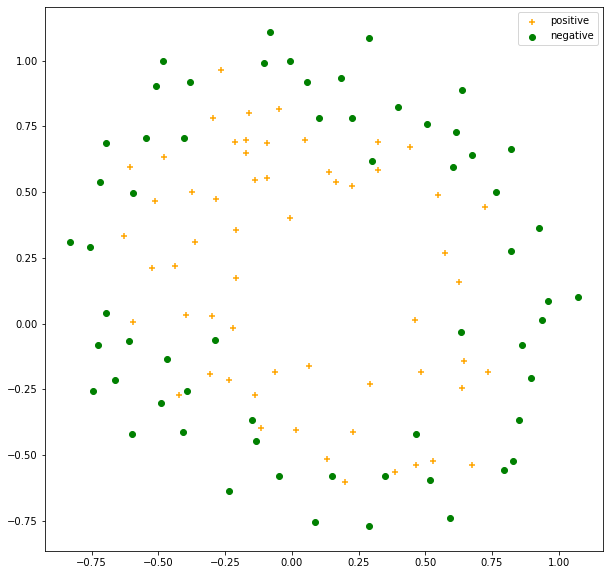

In [30]:
###Plotting the inputs for label specific
pos = y == 1
neg = y == 0
plt.scatter(X[:,1,None][pos],X[:,2,None][pos],color='orange',marker='+',label='positive')
plt.scatter(X[:,1,None][neg],X[:,2,None][neg],color='green',label='negative')
plt.legend()

In [111]:
###Feature mapping to degree 6.
from sklearn.preprocessing import PolynomialFeatures
feature_mapper = PolynomialFeatures(degree=8)
X_fm = feature_mapper.fit_transform(X[:,1:])

In [112]:
print(X_fm.shape)
print(feature_mapper.get_feature_names)

(118, 45)
<bound method PolynomialFeatures.get_feature_names of PolynomialFeatures(degree=8)>


In [48]:
def costFunction_reg(Theta,X,y,lambd):
    # m -> Number of examples
    m = X.shape[0]
    # reshaping theta
    Theta = Theta.reshape(X.shape[1],1)
    
    # Computing Hypothesis value
    H = Sigmoid(np.dot(X,Theta))
    #print(H.shape)
    #Computing cost
    assert(y.shape==H.shape)
    J = - (np.dot(y.T,np.log(H)) + (np.dot(1-y.T,np.log(1-H))))/(m)
    #Adding regularization value. Regularization should be execluded for interceptor term.
    Jreg = np.sum(Theta[1:,:]**2)*(lambd/(2*m))
    J = J + Jreg
    
    ###Gradient calculation
    grads = np.dot(X.T,(H-y))/m
    ###Adding regularization to grads
    grads[1:,:] = grads[1:,:] +  (lambd/m)*Theta[1:,:]
    
    return J,grads

In [114]:
initial_theta =np.zeros((X_fm.shape[1],1))
lamd =1
cost,grads = costFunction_reg(initial_theta,X_fm,y,lamd)

In [35]:
print(cost)
print(grads[0:5,:])

[[0.69314718]]
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [36]:
def computeGrad(Theta,X,y,lambd):
    m = X.shape[0]
    # reshaping theta
    Theta = Theta.reshape(X.shape[1],1)
    
    # Computing Hypothesis value
    H = Sigmoid(np.dot(X,Theta))
    grads = np.dot(X.T,(H-y))/m
    ###Adding regularization to grads
    grads[1:,:] = grads[1:,:] +  (lambd/m)*Theta[1:,:]
    return grads


In [37]:
test_theta = np.ones((X_fm.shape[1],1))
lamd =10
cost,grad = costFunction_reg(test_theta,X_fm,y,lamd)
print("cost "+str(cost))
print("grads "+ str(grad[0:5,:]))

(118, 1)
cost [[3.16450933]]
grads [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


In [38]:
###Only compute Cost
def computeCostOnly(Theta,X,y,lambd):
     # m -> Number of examples
    m = X.shape[0]
    # reshaping theta
    Theta = Theta.reshape(X.shape[1],1)
   # print(lambd)
    # Computing Hypothesis value
    H = Sigmoid(np.dot(X,Theta))
   # print(H.shape)
    #Computing cost
    assert(y.shape==H.shape)
    J = - (np.dot(y.T,np.log(H)) + (np.dot(1-y.T,np.log(1-H))))/(m)
    #Adding regularization value. Regularization should be execluded for interceptor term.
    Jreg = np.sum(Theta[1:,:]**2)*(lambd/(2*m))
    J = J + Jreg
    
    return J

In [39]:
#Linear Regression with Lambda 
learningrate=0.01
lambd =1
initial_theta =np.zeros((X_fm.shape[1],1))
result = opt.fmin_tnc(func=computeCostOnly,x0=initial_theta,fprime=computeGrad ,args=(X_fm,y,lambd))

In [40]:
print(result)
Theta = result[0].reshape(initial_theta.shape)

(array([ 1.27271026,  0.62529964,  1.18111686, -2.01987399, -0.91743189,
       -1.43166928,  0.12393228, -0.36553119, -0.35725404, -0.17516291,
       -1.4581701 , -0.05098418, -0.61558559, -0.27469166, -1.192713  ,
       -0.2421784 , -0.20603302, -0.04466177, -0.27778947, -0.29539513,
       -0.45645982, -1.04319154,  0.02779373, -0.29244864,  0.01555759,
       -0.32742403, -0.14389149, -0.92467487]), 32, 1)


In [41]:
p = predict(X_fm,Theta)

In [42]:
print(np.average(p==y))

0.8305084745762712


In [46]:
####Implementing gradient descent
def gradientDescent(Theta,X,y,learningrate,lambd,iterations):
    # m -> number of examples
    m = X.shape[0]
    
    #J -> cost for number of iterations
    J = np.zeros((iterations,1))
    
    for i in range(iterations):
        cost,grads =  costFunction_reg(Theta,X,y,lambd)
        J[i] = cost
        assert(Theta.shape==grads.shape)
        Theta = Theta - (learningrate * grads) 
    
    return Theta,J

In [120]:
lambd =1
learningrate=1
iterations=150000
Theta,J = gradientDescent(initial_theta,X_fm,y,learningrate,lambd,iterations)

In [121]:
Theta.shape

(45, 1)

In [122]:
p = predict(X_fm,Theta)

In [123]:
print("Testing accuracy"+str (np.average(p==y) * 100))

Testing accuracy83.05084745762711


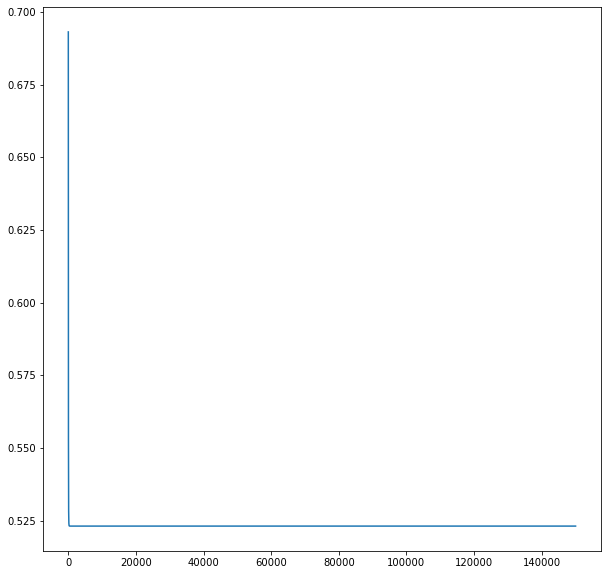

In [124]:
plt.plot(J)

# Implementing Logistic regression with Scikit library

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [126]:
lr = LogisticRegression()

In [127]:
feature_mapper = PolynomialFeatures(degree=6)
X_fm = feature_mapper.fit_transform(X[:,1:])

In [128]:
lr.fit(X_fm,y)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [132]:
y_pred =lr.predict(X_fm)

In [130]:
lr.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [133]:
accuracy_score(y,y_pred)

0.8305084745762712